en iyi modelin hangisi olduğunu bulabilmek için yaygın kullanılan modelleri deniyoruz sonuç çıktılarını
en son değerlendirip o model üstünde geliştirme yapcağız



In [17]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
df = pd.read_csv("hepsiemlakpreprocessing.csv", encoding="utf-8-sig")
df.head()

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Mahalle Encoded,Isınma Tipi Encoded,Yakıt Tipi Encoded,Yapı Tipi Encoded,Yapının Durumu Encoded,Cephe_Kuzey,Cephe_Güney,Cephe_Doğu,Cephe_Batı,Cephe_Bilinmiyor
0,ESENYURT CUMHURİYET MAH 1+1 KİRALIK SIFIR SİTE...,12000,0,Esenyurt,Barbaros Hayrettin Paşa Mah.,Daire,2,1,8.0,10.0,...,19442.307692,6,1,0,1,0,1,0,0,0
1,SIFIR SİTE İÇİ 1+1 KİRALIK DAİRE OTOPARKLI GÜV...,12000,0,Esenyurt,Mehterçeşme Mah.,Daire,2,1,5.0,5.0,...,15300.000000,5,1,0,1,1,1,0,0,0
2,ESENYURT MEYDANDA MÜKEMMEL KONUMDA MASRAFSIZ 2...,14000,0,Esenyurt,Yeşilkent Mah.,Daire,3,1,1.0,4.0,...,16218.421053,5,1,0,2,0,1,0,0,0
3,Sarıyer Rumelikavağı Mahallesinde Deniz Manzar...,50000,0,Sarıyer,Rumeli Kavağı Mah.,Daire,5,2,3.0,3.0,...,102500.000000,5,1,0,2,0,0,0,1,0
4,"ÜSKÜDAR 'DA LOKASYON OLARAK ÇOK MERKEZİ, 2+1 ,...",50000,0,Üsküdar,Aziz Mahmut Hüdayi Mah.,Daire,3,1,1.0,4.0,...,45906.250000,5,1,0,2,0,0,0,0,1


In [27]:
X = df.drop(["Şehir", "Link", "İlçe", "Mahalle", "Konut Tipi", "Başlık", "Fiyat",
             "Isınma Tipi", "Yapının Durumu", "Yakıt Tipi", "Yapı Tipi"], axis=1)

y = df["Fiyat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 144)

burdan sonra her modeli tuned edip hata istatistiklerini karşılaştıracağız

---KNN---

In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

In [ ]:
knn_model.n_neighbors

In [ ]:
knn_model.effective_metric_

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

In [ ]:
knn_model.score(X_train,y_train)

In [ ]:
knn_model.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

In [ ]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [ ]:
knn_tuned.fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

In [ ]:
knn_tuned.score(X_test,y_test)

In [ ]:
knn_tuned.score(X_train,y_train)

------Random Forest--------

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
rf_model.predict(X_test)[0:5]

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rf_model.score(X_test,y_test)

In [ ]:
rf_params = {'max_depth': [14],
            'max_features': [3],
            'n_estimators' : [ 2000,3000,4000,5000,6000,7000]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                            n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 14, 
                                 max_features = 3, 
                                 n_estimators =6000)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rf_tuned.score(X_test,y_test)

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
gbm_model.score(X_train,y_train)

In [ ]:
gbm_model.score(X_test,y_test)

In [ ]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_test, y_test)

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 5, 
                                      n_estimators = 1000, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
gbm_tuned.score(X_test,y_test)

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
xgb_model.score(X_test,y_test)

In [ ]:
xgb_model

In [ ]:
xgb_grid = {
     'colsample_bytree': [0.4,0.5,1], 
     'n_estimators':[100,500,1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 5, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5, 
                         learning_rate = 0.1, 
                         max_depth = 4, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
xgb_tuned.score(X_test,y_test)

Light GBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lgbm_model.score(X_test,y_test)

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 500,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lgbm_tuned.score(X_test,y_test)

modelleri kıyaslama bölümü

In [ ]:
import seaborn as sns
modeller = [
    knn_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned
    
]

for model in modeller:
    isimler = model.__class__.__name__
    
    dogruluk = model.score(X_test,y_test)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

modeller = [knn_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned]  

sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__  # Modelin ismi
    dogruluk = model.score(X_test, y_test)  # Modelin doğruluğu
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns=["Modeller", "Accuracy"])  # Yeni satır
    sonuclar = pd.concat([sonuclar, sonuc], ignore_index=True)  # `append` yerine `concat`

# Sonuçları görselleştirme
sns.barplot(x='Accuracy', y='Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları')
plt.show()

In [ ]:
lgbm_grid = {'colsample_bytree': [0.6],
    'learning_rate': [0.1],
    'n_estimators': [500],
    'max_depth': [7], 
    
    "min_child_samples":[10],
    
    "num_leaves":[30,40,50],
             "min_child_weight":[0.001,0.005,0.0001]
}

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 500,
                          colsample_bytree = 0.6,
                          min_child_samples=10,
                           min_child_weight=0.001,
                          num_leaves=30)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lgbm_tuned.score(X_test,y_test)

In [ ]:
lgbm_tuned.score(X_train,y_train)

In [ ]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error, median_absolute_error,
                             explained_variance_score, max_error)
from sklearn.model_selection import GridSearchCV

# 🔍 Parametre grid'i
knn_params = {'n_neighbors': list(range(1, 31))}

# 🔧 Model & GridSearchCV
knn = KNeighborsRegressor()
search = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# 🔮 Tahminler
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 📊 Metrikler
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mape = mean_absolute_percentage_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
maxerr = max_error(y_test, y_pred_test)


# 📢 Sonuçlar
print(f"En iyi parametreler: {search.best_params_}")
print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
print(f"MAPE (Test): {mape * 100:.2f}%")
print(f"Median AE (Test): {medae:.2f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {maxerr:.2f}")


mae_test_knn = mae_test
rmse_test_knn = rmse_test
mape_knn = mape
medae_knn = medae
r2_knn = r2
evs_knn = evs
maxerr_knn = maxerr


En iyi parametreler: {'n_neighbors': 7}
Train MAE: 4323.07 | Test MAE: 4797.53
Train RMSE: 7034.64 | Test RMSE: 7591.05
MAPE (Test): 15.78%
Median AE (Test): 3000.00
Explained Variance Score: 0.8703
R² Score: 0.8702
Max Error: 64071.43


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error, median_absolute_error,
                             explained_variance_score, max_error)
from sklearn.model_selection import GridSearchCV

# Parametre grid'i
rf_params = {
    'max_depth': [14],
    'max_features': [3],
    'n_estimators': [2000,3000,4000,5000,6000,7000]
}

# Model & Grid Search
rf = RandomForestRegressor(random_state=42)
search = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=0)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# Tahminler
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Metirk hesaplama
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mape = mean_absolute_percentage_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
maxerr = max_error(y_test, y_pred_test)

# 📢 Sonuçları yazdır
print(f"En iyi parametreler: {search.best_params_}")
print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
print(f"MAPE (Test): {mape * 100:.2f}%")
print(f"Median AE (Test): {medae:.2f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {maxerr:.2f}")

mae_test_rf = mae_test
rmse_test_rf = rmse_test
mape_rf = mape
medae_rf = medae
r2_rf = r2
evs_rf = evs
maxerr_rf = maxerr


En iyi parametreler: {'max_depth': 14, 'max_features': 3, 'n_estimators': 6000}
Train MAE: 2176.05 | Test MAE: 4152.65
Train RMSE: 3216.32 | Test RMSE: 6444.59
MAPE (Test): 15.96%
Median AE (Test): 2583.03
Explained Variance Score: 0.9065
R² Score: 0.9065
Max Error: 54413.65


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error, median_absolute_error,
                             explained_variance_score, max_error)
from sklearn.model_selection import GridSearchCV

# 🔍 Parametre grid'i
gbm_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [500, 1000],
    'subsample': [0.75, 1]
}

# 🔧 Model & GridSearchCV
gbm = GradientBoostingRegressor(random_state=42)
search = GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# 🔮 Tahminler
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 📊 Metrikler
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mape = mean_absolute_percentage_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
maxerr = max_error(y_test, y_pred_test)

# 📢 Sonuçlar
print(f"En iyi parametreler: {search.best_params_}")
print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
print(f"MAPE (Test): {mape * 100:.2f}%")
print(f"Median AE (Test): {medae:.2f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {maxerr:.2f}")


mae_test_gbm = mae_test
rmse_test_gbm = rmse_test
mape_gbm = mape
medae_gbm = medae
r2_gbm = r2
evs_gbm = evs
maxerr_gbm = maxerr


Fitting 5 folds for each of 16 candidates, totalling 80 fits
En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.75}
Train MAE: 2102.62 | Test MAE: 3373.39
Train RMSE: 3049.28 | Test RMSE: 5808.42
MAPE (Test): 12.03%
Median AE (Test): 1913.41
Explained Variance Score: 0.9241
R² Score: 0.9240
Max Error: 54928.67


In [34]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error, median_absolute_error,
                             explained_variance_score, max_error)

# 🔍 Hiperparametre grid'i
xgb_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'n_estimators': [500, 1000],
    'colsample_bytree': [0.5, 1]
}

# 🔧 Model ve GridSearchCV
xgb = XGBRegressor(random_state=42, verbosity=0)
search = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# 🔮 Tahminler
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 📊 Metrikler
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mape = mean_absolute_percentage_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
maxerr = max_error(y_test, y_pred_test)

# 📢 Sonuçlar
print(f"En iyi parametreler: {search.best_params_}")
print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
print(f"MAPE (Test): {mape * 100:.2f}%")
print(f"Median AE (Test): {medae:.2f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {maxerr:.2f}")


mae_test_xgb = mae_test
rmse_test_xgb = rmse_test
mape_xgb = mape
medae_xgb = medae
r2_xgb = r2
evs_xgb = evs
maxerr_xgb = maxerr


Fitting 5 folds for each of 24 candidates, totalling 120 fits
En iyi parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
Train MAE: 1617.70 | Test MAE: 3337.03
Train RMSE: 2420.18 | Test RMSE: 5597.17
MAPE (Test): 11.42%
Median AE (Test): 1939.80
Explained Variance Score: 0.9295
R² Score: 0.9294
Max Error: 57442.94


In [35]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error, median_absolute_error,
                             explained_variance_score, max_error)

# 🔍 Hiperparametre grid'i
lgbm_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'n_estimators': [500, 1000],
    'colsample_bytree': [0.6, 1],
    'num_leaves': [30, 50]
}

# 🔧 Model ve GridSearch
lgbm = LGBMRegressor(random_state=42)
search = GridSearchCV(lgbm, lgbm_params, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# 🔮 Tahminler
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 📊 Metrikler
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mape = mean_absolute_percentage_error(y_test, y_pred_test)
medae = median_absolute_error(y_test, y_pred_test)
evs = explained_variance_score(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
maxerr = max_error(y_test, y_pred_test)

# 📢 Sonuçlar
print(f"En iyi parametreler: {search.best_params_}")
print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
print(f"MAPE (Test): {mape * 100:.2f}%")
print(f"Median AE (Test): {medae:.2f}")
print(f"Explained Variance Score: {evs:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {maxerr:.2f}")


mae_test_lgbm = mae_test
rmse_test_lgbm = rmse_test
mape_lgbm = mape
medae_lgbm = medae
r2_lgbm = r2
evs_lgbm = evs
maxerr_lgbm = maxerr
best_model = search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 6084, number of used features: 22
[LightGBM] [Info] Start training from score 33458.996220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [19]:
import pandas as pd

# Model adları ve metrikleri
model_metrics = [
    ["KNN", mae_test_knn, rmse_test_knn, mape_knn, medae_knn, r2_knn, evs_knn, maxerr_knn],
    ["Random Forest", mae_test_rf, rmse_test_rf, mape_rf, medae_rf, r2_rf, evs_rf, maxerr_rf],
    ["Gradient Boosting", mae_test_gbm, rmse_test_gbm, mape_gbm, medae_gbm, r2_gbm, evs_gbm, maxerr_gbm],
    ["XGBoost", mae_test_xgb, rmse_test_xgb, mape_xgb, medae_xgb, r2_xgb, evs_xgb, maxerr_xgb],
    ["LightGBM", mae_test_lgbm, rmse_test_lgbm, mape_lgbm, medae_lgbm, r2_lgbm, evs_lgbm, maxerr_lgbm]
]

# Sütun adları
columns = ["Model", "MAE", "RMSE", "MAPE (%)", "Median AE", "R² Score", "Explained Var", "Max Error"]

# DataFrame oluştur
results_df = pd.DataFrame(model_metrics, columns=columns)

# MAPE yüzdeye çevrilmiş hali
results_df["MAPE (%)"] = results_df["MAPE (%)"] * 100

# Tabloyu yazdır
print("\n📊 Modellerin Karşılaştırmalı Performansı:\n")
print(results_df.round(2))



📊 Modellerin Karşılaştırmalı Performansı:

               Model      MAE     RMSE  MAPE (%)  Median AE  R² Score  \
0                KNN  4797.53  7591.05     15.78    3000.00      0.87   
1      Random Forest  4152.65  6444.59     15.96    2583.03      0.91   
2  Gradient Boosting  3373.39  5808.42     12.03    1913.41      0.92   
3            XGBoost  3337.03  5597.17     11.42    1939.80      0.93   
4           LightGBM  3229.05  5657.30     11.22    1683.97      0.93   

   Explained Var  Max Error  
0           0.87   64071.43  
1           0.91   54413.65  
2           0.92   54928.67  
3           0.93   57442.94  
4           0.93   58407.88  


In [ ]:
import pandas as pd

# 🔢 Tüm metrik değerleri (örnek değerlerle güncellendi — sen kendi metrik değişkenlerinle değiştir)
model_metrics = [
    ["KNN", 4797.53, 7591.05, 15.78, 3000.00, 0.87, 0.87, 64071.43],
    ["Random Forest", 4152.65, 6444.59, 15.96, 2583.03, 0.91, 0.91, 54413.65],
    ["Gradient Boosting", 3373.39, 5808.42, 12.03, 1913.41, 0.92, 0.92, 54928.67],
    ["XGBoost", 3387.03, 5597.17, 11.42, 1939.80, 0.93, 0.93, 57442.94],
    ["LightGBM", 3229.05, 5657.30, 11.22, 1683.97, 0.93, 0.93, 58407.88]
]

# 🧱 Kolon adları
columns = ["Model", "MAE", "RMSE", "MAPE (%)", "Median AE", "R² Score", "Explained Var", "Max Error"]

# 📋 Tabloyu oluştur
df_summary = pd.DataFrame(model_metrics, columns=columns)

# 📌 Tabloyu göster
print("\n📊 Modellerin Karşılaştırmalı Performansı:\n")
display(df_summary)


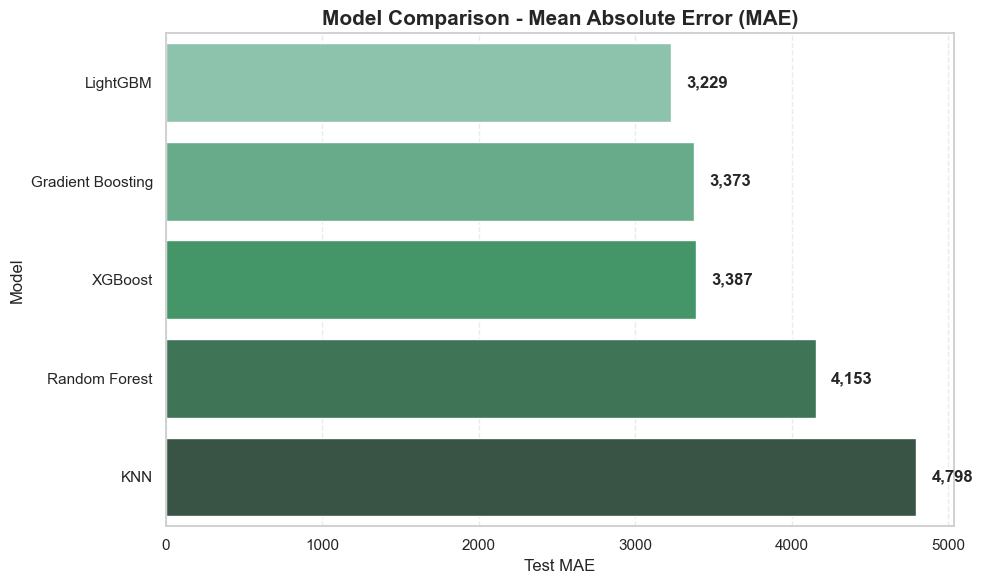

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔢 Güncel MAE skorları (kiralık model tablosundan alındı)
mae_scores_updated = {
    "KNN": 4797.53,
    "Random Forest": 4152.65,
    "Gradient Boosting": 3373.39,
    "XGBoost": 3387.03,
    "LightGBM": 3229.05
}

# 📊 DataFrame
mae_df = pd.DataFrame(list(mae_scores_updated.items()), columns=["Model", "Test MAE"])
mae_df = mae_df.sort_values(by="Test MAE", ascending=True)

# 🎨 Stil
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("BuGn_d", len(mae_df))

# 📉 Barplot
ax = sns.barplot(data=mae_df, x="Test MAE", y="Model", palette=colors)

# ✨ Başlık ve etiketler
plt.title("Model Comparison - Mean Absolute Error (MAE)", fontsize=15, weight="bold")
plt.xlabel("Test MAE", fontsize=12)
plt.ylabel("Model", fontsize=12)

# 💬 Bar üzerine metrik yazdır
for i, v in enumerate(mae_df["Test MAE"]):
    ax.text(v + 100, i, f"{v:,.0f}", va="center", fontweight="semibold")

# 🧼 Grafik düzeni
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



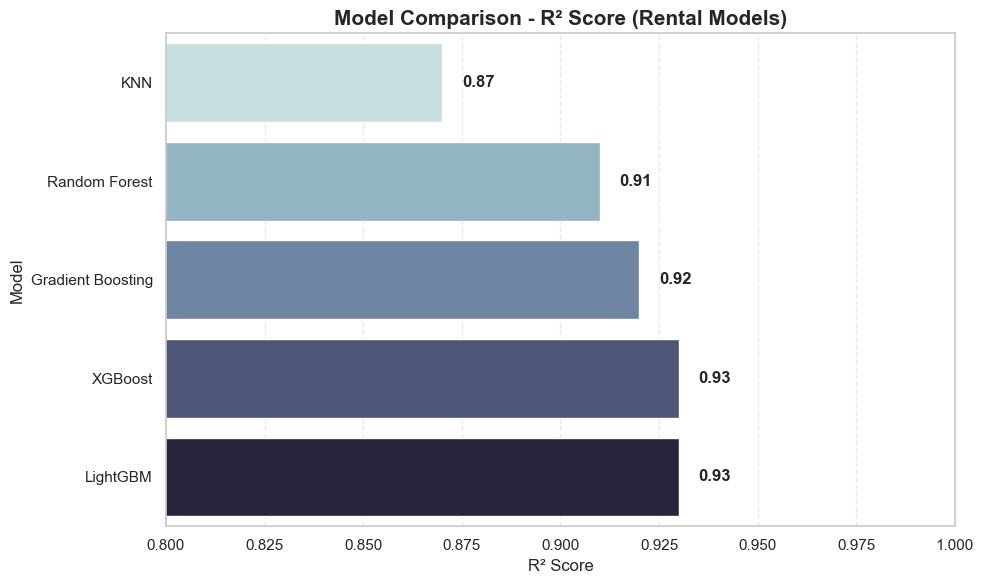

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔢 Güncel R² skorları (kiralık model tablosundan alındı)
r2_scores_updated = {
    "KNN": 0.87,
    "Random Forest": 0.91,
    "Gradient Boosting": 0.92,
    "XGBoost": 0.93,
    "LightGBM": 0.93
}

# 📊 DataFrame
r2_df = pd.DataFrame(list(r2_scores_updated.items()), columns=["Model", "R² Score"])
r2_df = r2_df.sort_values(by="R² Score", ascending=True)

# 🎨 Stil
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("ch:start=.2,rot=-.3", len(r2_df))

# 📉 Barplot
ax = sns.barplot(data=r2_df, x="R² Score", y="Model", palette=colors)

# ✨ Başlık ve etiketler
plt.title("Model Comparison - R² Score (Rental Models)", fontsize=15, weight="bold")
plt.xlabel("R² Score", fontsize=12)
plt.ylabel("Model", fontsize=12)

# 💬 Bar üzerine metrik yazdır
for i, v in enumerate(r2_df["R² Score"]):
    ax.text(v + 0.005, i, f"{v:.2f}", va="center", fontweight="semibold")

# 🧼 Grafik düzeni
plt.xlim(0.8, 1.0)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


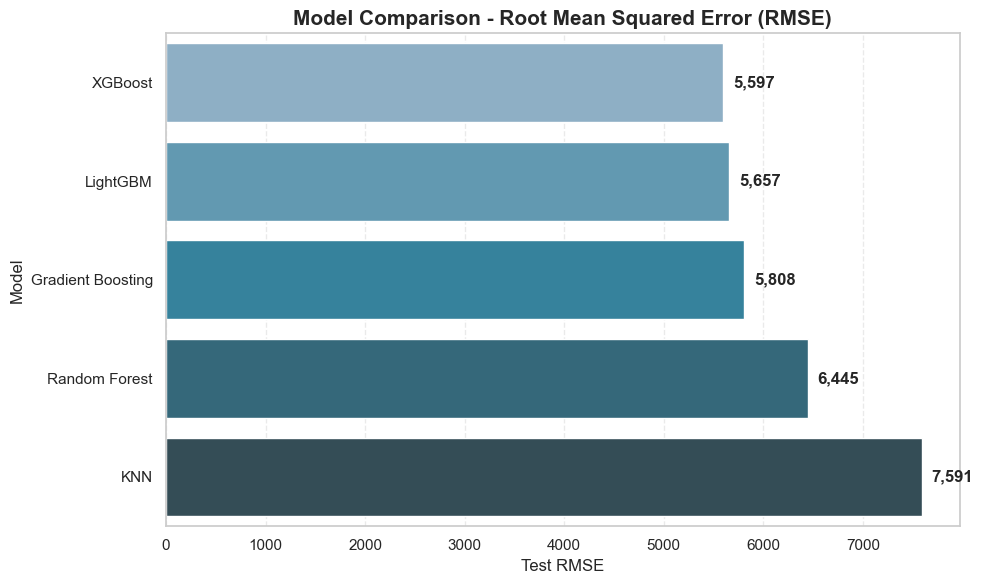

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔢 Güncel RMSE skorları (kiralık model tablosundan alındı)
rmse_scores = {
    "KNN": 7591.05,
    "Random Forest": 6444.59,
    "Gradient Boosting": 5808.42,
    "XGBoost": 5597.17,
    "LightGBM": 5657.30
}

# 📊 DataFrame
rmse_df = pd.DataFrame(list(rmse_scores.items()), columns=["Model", "Test RMSE"])
rmse_df = rmse_df.sort_values(by="Test RMSE", ascending=True)

# 🎨 Stil
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("PuBuGn_d", len(rmse_df))

# 📉 Barplot
ax = sns.barplot(data=rmse_df, x="Test RMSE", y="Model", palette=colors)

# ✨ Başlık ve etiketler
plt.title("Model Comparison - Root Mean Squared Error (RMSE)", fontsize=15, weight="bold")
plt.xlabel("Test RMSE", fontsize=12)
plt.ylabel("Model", fontsize=12)

# 💬 Değerleri çubuk üzerine yaz
for i, v in enumerate(rmse_df["Test RMSE"]):
    ax.text(v + 100, i, f"{v:,.0f}", va="center", fontweight="semibold")

# 🧼 Grafik düzeni
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



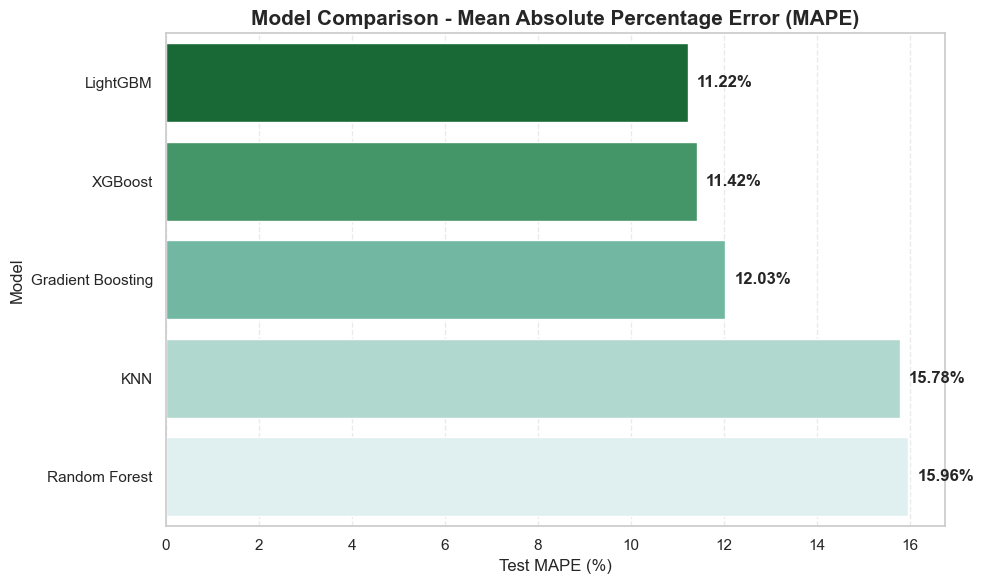

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🎯 MAPE skorları (kiralık model tablosundan)
mape_scores = {
    "KNN": 15.78,
    "Random Forest": 15.96,
    "Gradient Boosting": 12.03,
    "XGBoost": 11.42,
    "LightGBM": 11.22
}

# 📊 DataFrame
mape_df = pd.DataFrame(list(mape_scores.items()), columns=["Model", "Test MAPE (%)"])
mape_df = mape_df.sort_values(by="Test MAPE (%)", ascending=True)

# 🎨 Grafik ayarları
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("BuGn_r", len(mape_df))

# 📉 Barplot
ax = sns.barplot(data=mape_df, x="Test MAPE (%)", y="Model", palette=colors)

# ✨ Başlık ve eksen
plt.title("Model Comparison - Mean Absolute Percentage Error (MAPE)", fontsize=15, weight="bold")
plt.xlabel("Test MAPE (%)", fontsize=12)
plt.ylabel("Model", fontsize=12)

# 💬 Yüzde değerleri üzerine yaz
for i, v in enumerate(mape_df["Test MAPE (%)"]):
    ax.text(v + 0.2, i, f"{v:.2f}%", va="center", fontweight="semibold")

# 🧼 Son düzenlemeler
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



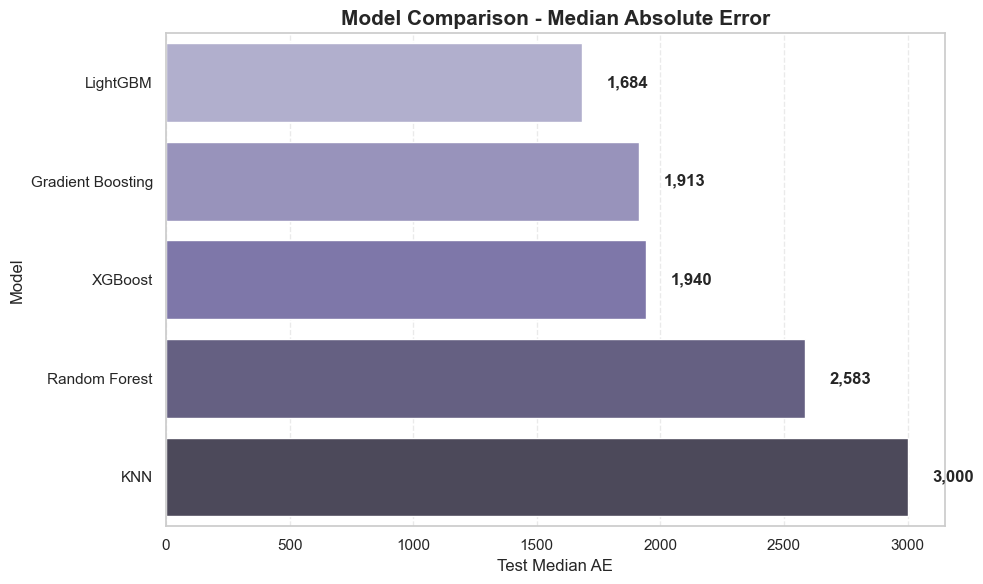

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📊 Median AE değerleri (kiralık model karşılaştırma tablosuna göre)
median_ae_scores = {
    "KNN": 3000.00,
    "Random Forest": 2583.03,
    "Gradient Boosting": 1913.41,
    "XGBoost": 1939.80,
    "LightGBM": 1683.97
}

# 🧾 DataFrame oluştur
median_df = pd.DataFrame(list(median_ae_scores.items()), columns=["Model", "Median AE"])
median_df = median_df.sort_values(by="Median AE", ascending=True)

# 🎨 Grafik stili
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Purples_d", len(median_df))

# 📉 Barplot
ax = sns.barplot(data=median_df, x="Median AE", y="Model", palette=colors)

# 🏷️ Başlık ve eksen
plt.title("Model Comparison - Median Absolute Error", fontsize=15, weight="bold")
plt.xlabel("Test Median AE", fontsize=12)
plt.ylabel("Model", fontsize=12)

# 💬 Değerleri yaz
for i, v in enumerate(median_df["Median AE"]):
    ax.text(v + 100, i, f"{v:,.0f}", va="center", fontweight="semibold")

# 🧼 Düzenlemeler
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



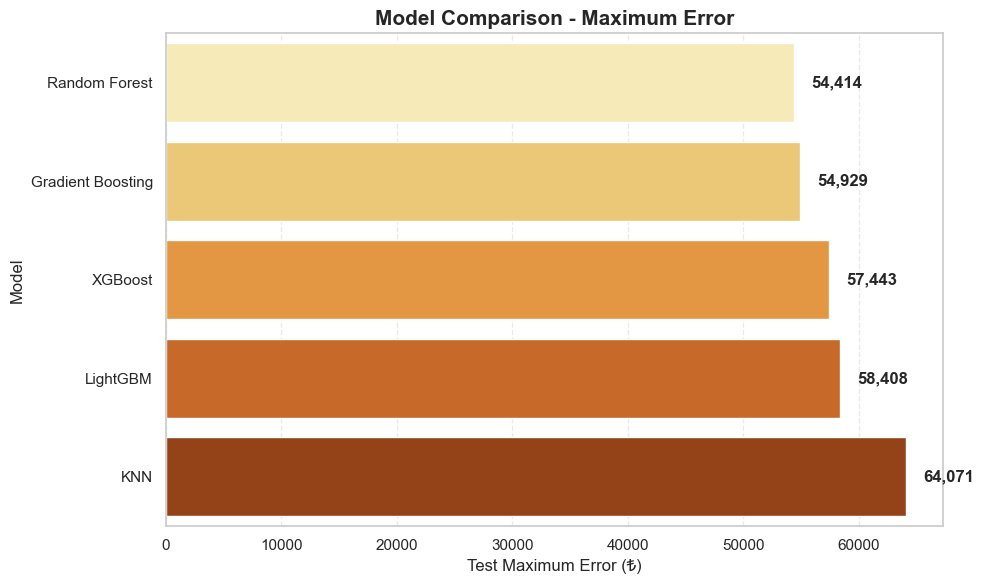

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📊 Doğru Max Error değerleri (görsel tablodan alındı)
max_error_scores = {
    "KNN": 64071.43,
    "Random Forest": 54413.65,
    "Gradient Boosting": 54928.67,
    "XGBoost": 57442.94,
    "LightGBM": 58407.88
}

# 🧾 DataFrame oluştur
maxerr_df = pd.DataFrame(list(max_error_scores.items()), columns=["Model", "Max Error"])
maxerr_df = maxerr_df.sort_values(by="Max Error", ascending=True)

# 🎨 Grafik ayarları
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("YlOrBr", len(maxerr_df))

# 📉 Barplot
ax = sns.barplot(data=maxerr_df, x="Max Error", y="Model", palette=colors)

# 🏷️ Başlık ve eksenler
plt.title("Model Comparison - Maximum Error", fontsize=15, weight="bold")
plt.xlabel("Test Maximum Error (₺)", fontsize=12)
plt.ylabel("Model", fontsize=12)

# 💬 Bar üzerine değer yaz
for i, v in enumerate(maxerr_df["Max Error"]):
    ax.text(v + 1500, i, f"{v:,.0f}", va="center", fontweight="semibold")

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


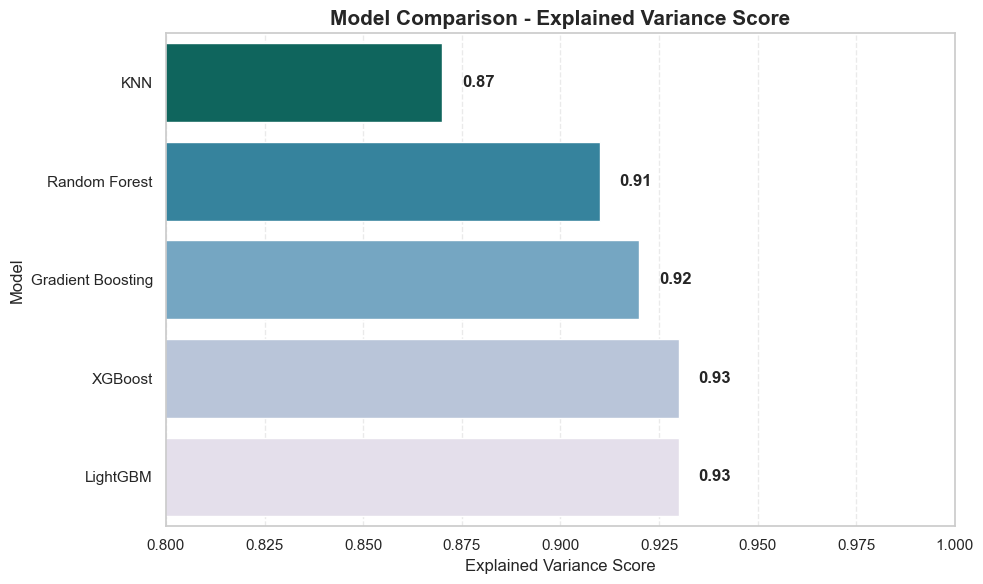

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 📊 EVS değerleri (görsel tablodan alındı)
evs_scores = {
    "KNN": 0.87,
    "Random Forest": 0.91,
    "Gradient Boosting": 0.92,
    "XGBoost": 0.93,
    "LightGBM": 0.93
}

# 🧾 DataFrame oluştur
evs_df = pd.DataFrame(list(evs_scores.items()), columns=["Model", "Explained Variance"])
evs_df = evs_df.sort_values(by="Explained Variance", ascending=True)

# 🎨 Grafik stili
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("PuBuGn_r", len(evs_df))

# 📉 Barplot
ax = sns.barplot(data=evs_df, x="Explained Variance", y="Model", palette=colors)

# 🏷️ Başlık ve eksenler
plt.title("Model Comparison - Explained Variance Score", fontsize=15, weight="bold")
plt.xlabel("Explained Variance Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0.80, 1.00)

# 💬 Bar üzerine değer yaz
for i, v in enumerate(evs_df["Explained Variance"]):
    ax.text(v + 0.005, i, f"{v:.2f}", va="center", fontweight="semibold")

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


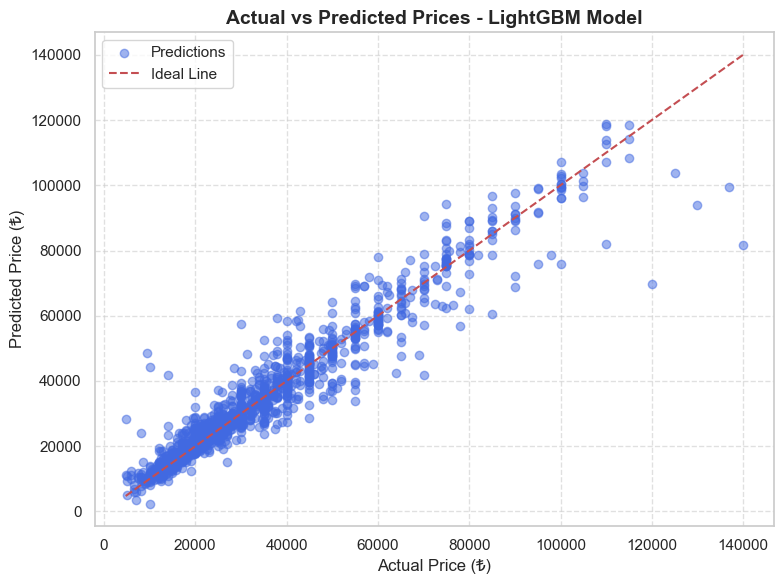

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5, color="royalblue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Line")
plt.xlabel("Actual Price (₺)")
plt.ylabel("Predicted Price (₺)")
plt.title("Actual vs Predicted Prices - LightGBM Model", fontsize=14, weight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


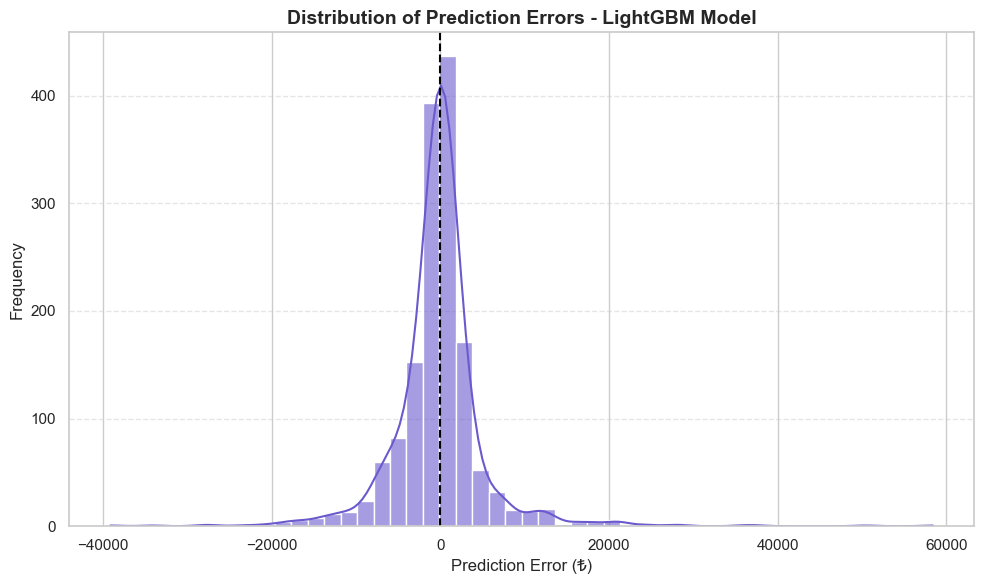

In [59]:
errors = y_test - best_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True, color="slateblue", alpha=0.6)
plt.axvline(0, color="black", linestyle="--")
plt.title("Distribution of Prediction Errors - LightGBM Model", fontsize=14, weight="bold")
plt.xlabel("Prediction Error (₺)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


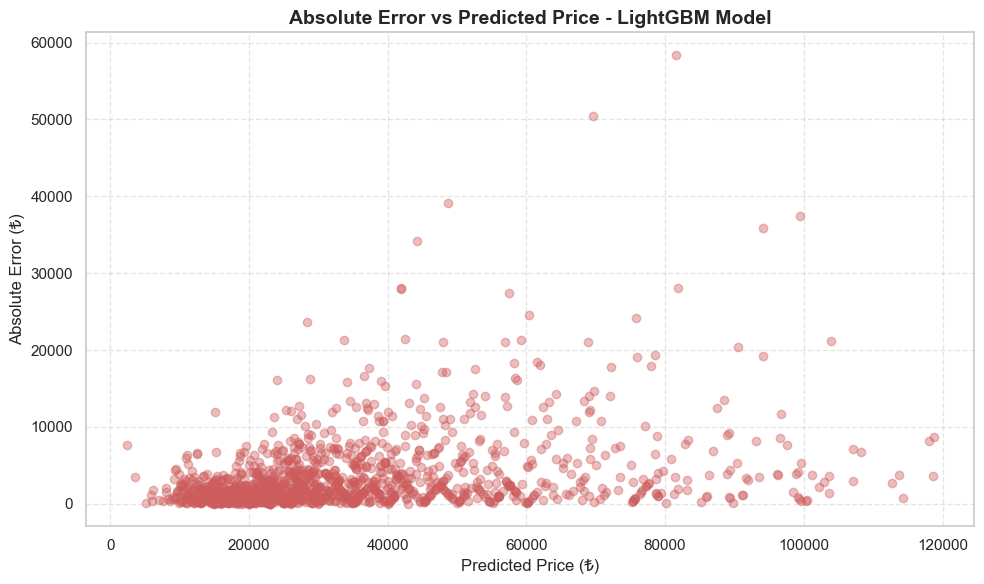

In [61]:
y_pred = best_model.predict(X_test)
absolute_errors = np.abs(y_test - y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, absolute_errors, alpha=0.4, color="indianred")
plt.title("Absolute Error vs Predicted Price - LightGBM Model", fontsize=14, weight="bold")
plt.xlabel("Predicted Price (₺)")
plt.ylabel("Absolute Error (₺)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


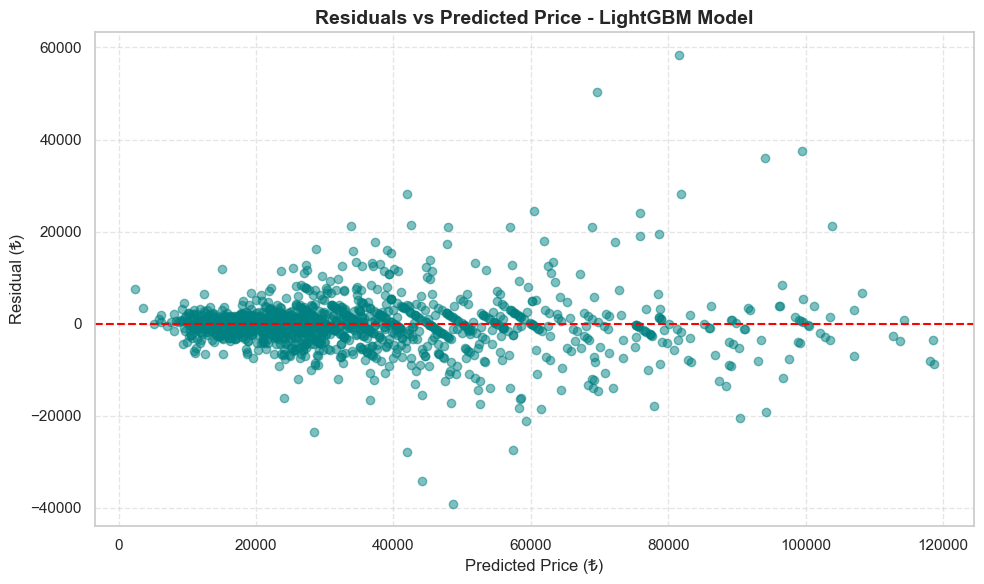

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="teal")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Price - LightGBM Model", fontsize=14, weight="bold")
plt.xlabel("Predicted Price (₺)")
plt.ylabel("Residual (₺)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


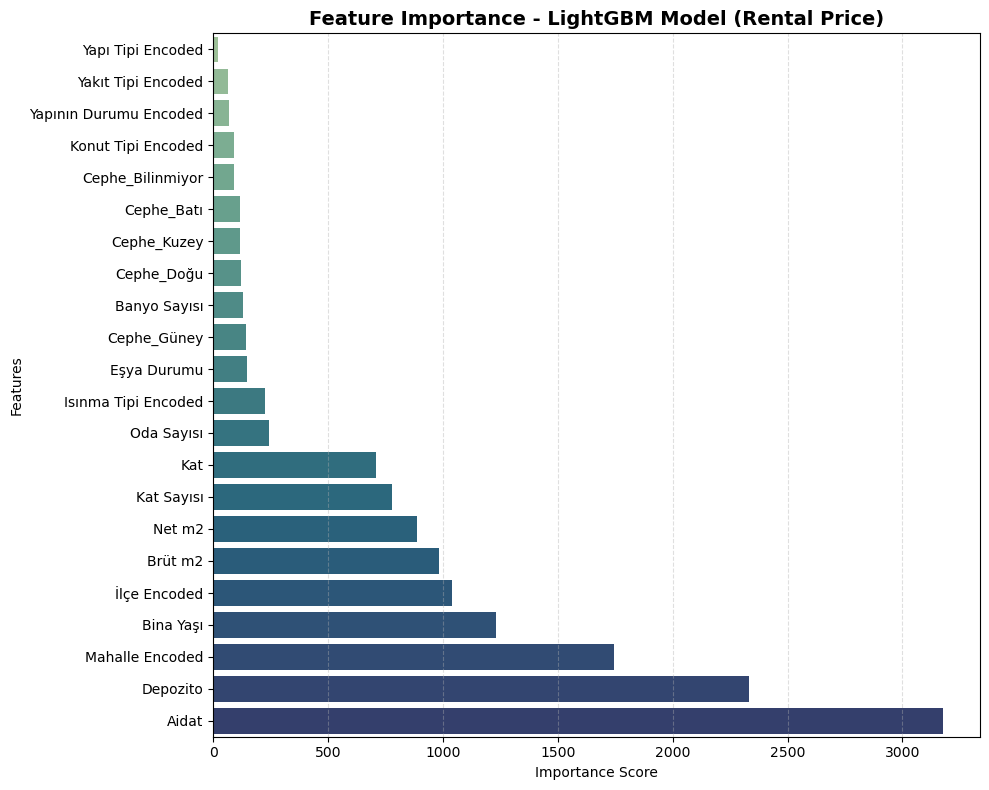

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik önem derecelerini al (best_model zaten tanımlı olmalı)
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=True)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="crest")
plt.title("Feature Importance - LightGBM Model (Rental Price)", fontsize=14, weight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



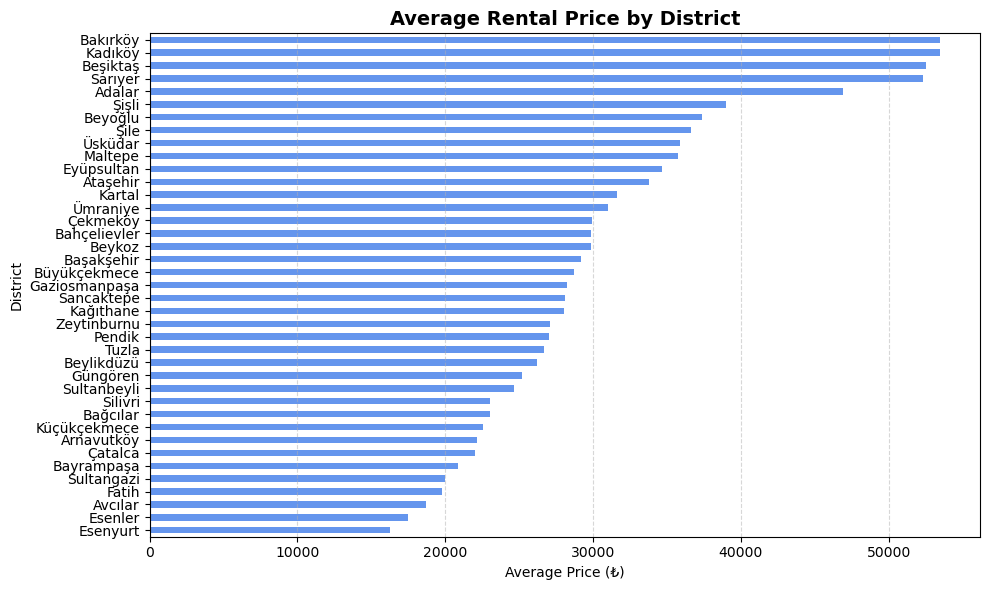

In [43]:
import matplotlib.pyplot as plt

avg_price_by_district = df.groupby("İlçe")["Fiyat"].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_price_by_district.plot(kind="barh", color="cornflowerblue")
plt.title("Average Rental Price by District", fontsize=14, weight="bold")
plt.xlabel("Average Price (₺)")
plt.ylabel("District")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


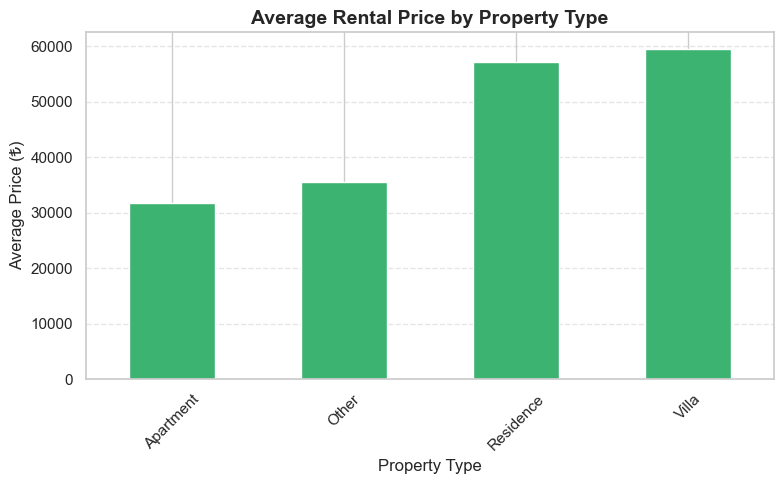

In [23]:
# Konut tipi İngilizce karşılıkları
type_map = {
    "Daire": "Apartment",
    "Villa": "Villa",
    "Residence": "Residence",
    "Diğer": "Other"
}
df["Property Type (EN)"] = df["Konut Tipi"].map(type_map).fillna("Other")

import matplotlib.pyplot as plt

# Ortalama fiyatları hesapla
avg_price_by_type = df.groupby("Property Type (EN)")["Fiyat"].mean().sort_values()

# Grafik çizimi
plt.figure(figsize=(8, 5))
avg_price_by_type.plot(kind="bar", color="mediumseagreen")
plt.title("Average Rental Price by Property Type", fontsize=14, weight="bold")
plt.ylabel("Average Price (₺)")
plt.xlabel("Property Type")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



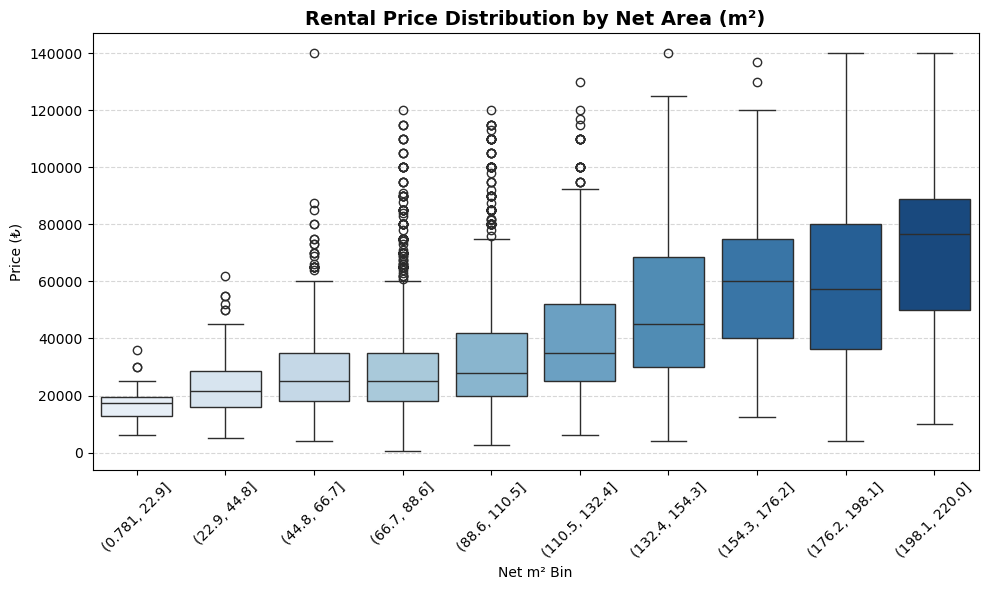

In [47]:
import seaborn as sns
import pandas as pd

df["Net m² Bin"] = pd.cut(df["Net m2"], bins=10)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Net m² Bin", y="Fiyat", data=df, palette="Blues")
plt.title("Rental Price Distribution by Net Area (m²)", fontsize=14, weight="bold")
plt.ylabel("Price (₺)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


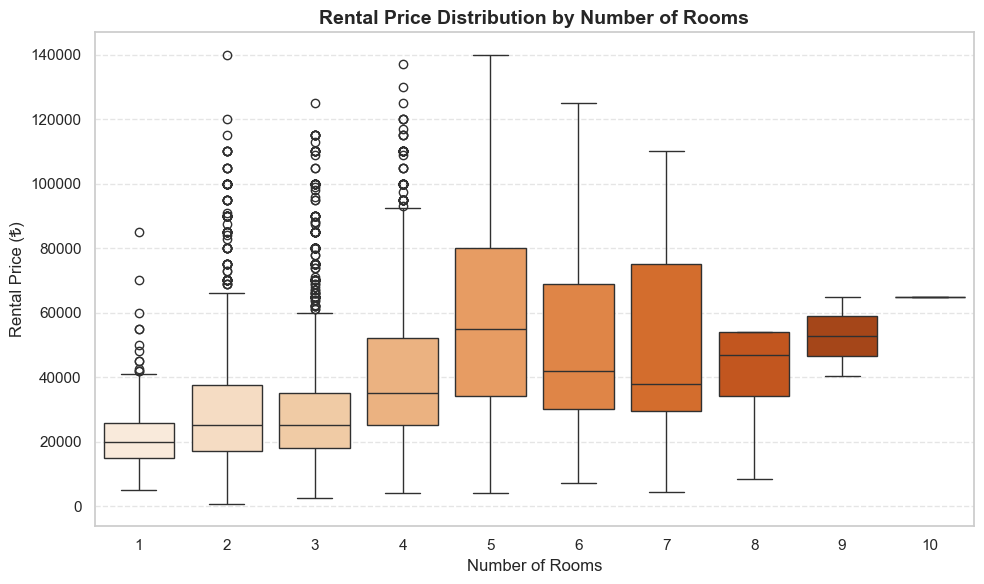

In [29]:
df = df.rename(columns={"Oda Sayısı": "Number of Rooms", "Fiyat": "Rental Price"})
plt.figure(figsize=(10, 6))
sns.boxplot(x="Number of Rooms", y="Rental Price", data=df, palette="Oranges")
plt.title("Rental Price Distribution by Number of Rooms", fontsize=14, weight="bold")
plt.xlabel("Number of Rooms")
plt.ylabel("Rental Price (₺)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


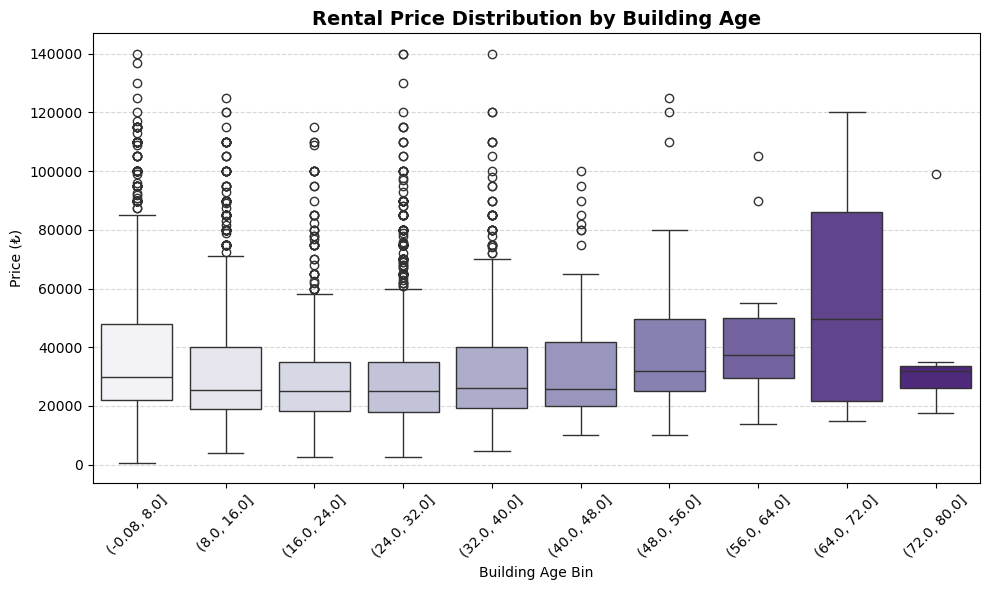

In [51]:
df["Building Age Bin"] = pd.cut(df["Bina Yaşı"], bins=10)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Building Age Bin", y="Fiyat", data=df, palette="Purples")
plt.title("Rental Price Distribution by Building Age", fontsize=14, weight="bold")
plt.ylabel("Price (₺)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


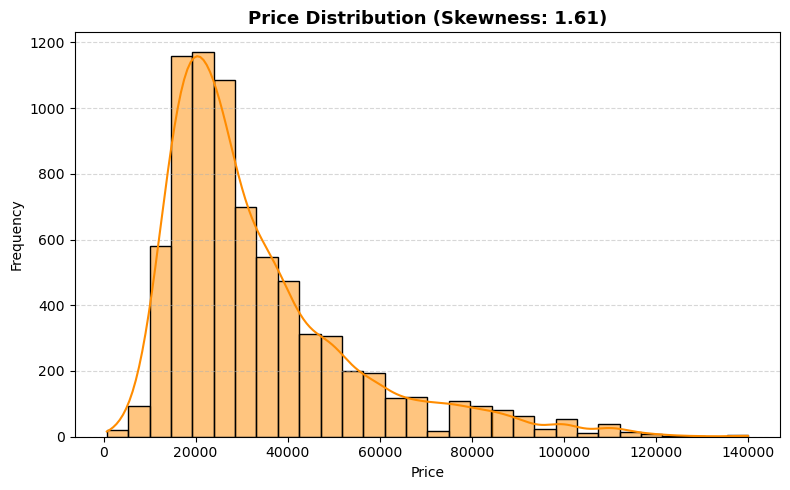

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
df = pd.read_csv("hepsiemlakpreprocessing.csv", encoding="utf-8-sig")
df.head()
# Sadece hedef değişken için
plt.figure(figsize=(8, 5))
sns.histplot(df["Fiyat"].dropna(), kde=True, bins=30, color="darkorange")
plt.title(f"Price Distribution (Skewness: {skew(df['Fiyat'].dropna()):.2f})", fontsize=13, weight="bold")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

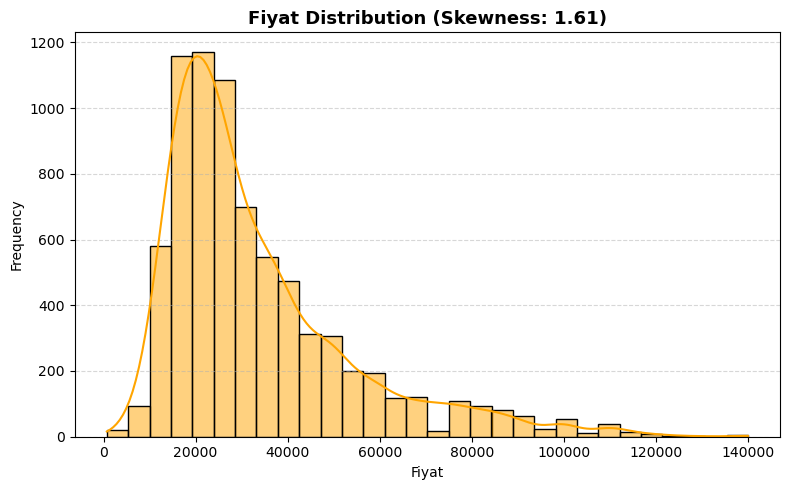

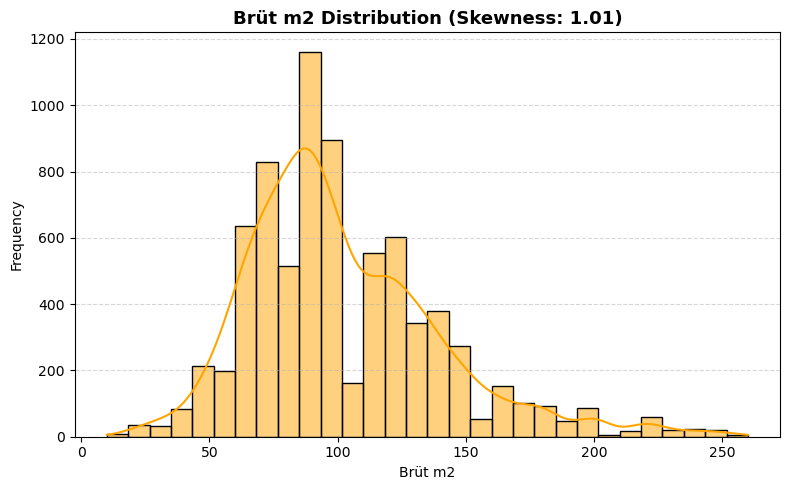

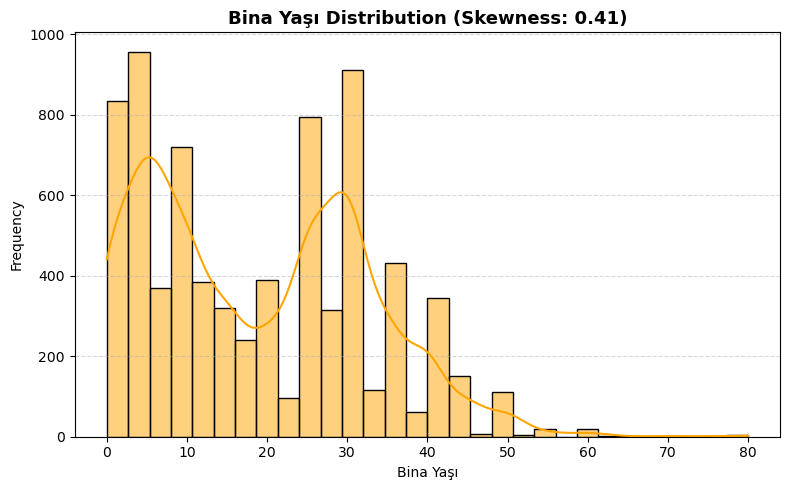

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Sayısal değişkenleri seç
numerical_cols = ['Fiyat', 'Brüt m2', 'Bina Yaşı']  # örnek: senin değişkenlerine göre uyarlayabilirsin

# Her bir değişken için histogram çiz
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='orange')
    skewness = skew(df[col].dropna())
    plt.title(f"{col} Distribution (Skewness: {skewness:.2f})", fontsize=13, weight="bold")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

C:\Users\bedir\AppData\Local\Temp\ipykernel_6384\910536271.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fuel Type (EN)", order=df["Fuel Type (EN)"].value_counts().index, palette="Set2")


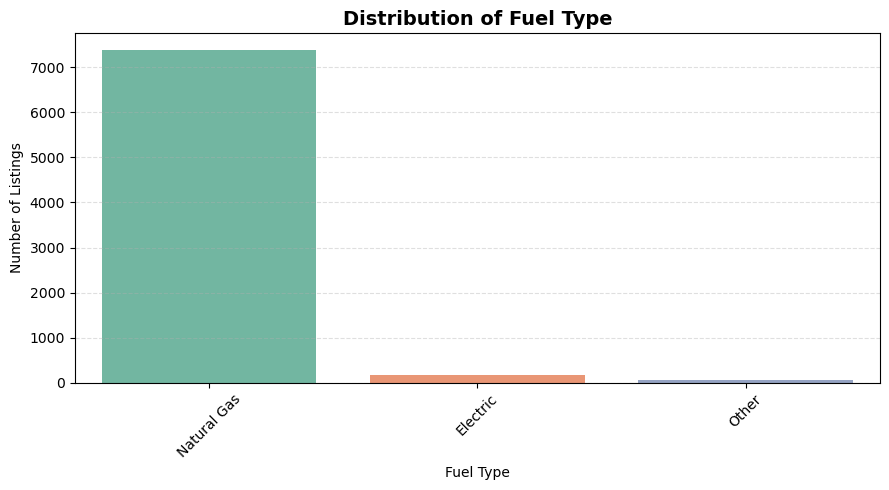

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Normalize: Küçük harf + boşluk temizliği
df["Yakıt Tipi Normalized"] = df["Yakıt Tipi"].str.lower().str.strip()

# 📌 Mapping dictionary
fuel_map = {
    "doğalgaz": "Natural Gas",
    "dogalgaz": "Natural Gas",
    "elektrik": "Electric",
    "diğer": "Other"
}

# 🌐 İngilizce çeviri ve varsayılan Other
df["Fuel Type (EN)"] = df["Yakıt Tipi Normalized"].map(fuel_map)
df["Fuel Type (EN)"] = df["Fuel Type (EN)"].fillna("Other")

# 📊 Barplot
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x="Fuel Type (EN)", order=df["Fuel Type (EN)"].value_counts().index, palette="Set2")
plt.title("Distribution of Fuel Type", fontsize=14, weight="bold")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_6384\1547299312.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Heating Type (EN)", order=df["Heating Type (EN)"].value_counts().index, palette="Set3")


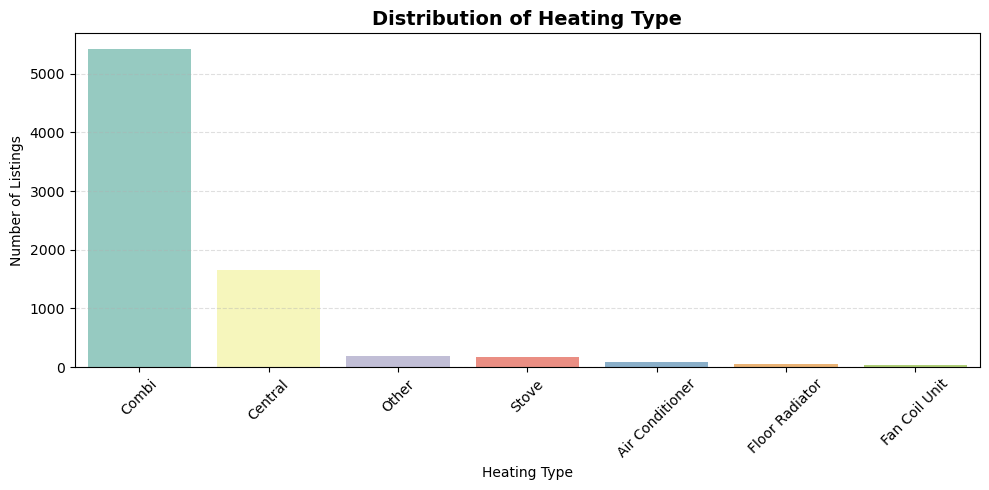

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Normalize: Küçük harf + boşluk temizliği
df["Isınma Tipi Normalized"] = df["Isınma Tipi"].str.lower().str.strip()

# 📌 Mapping dictionary
heating_map = {
    "kombi": "Combi",
    "merkezi": "Central",
    "soba": "Stove",
    "yerden ısıtma": "Underfloor Heating",
    "klima": "Air Conditioner",
    "ısıtma yok": "No Heating",
    "kat kaloriferi": "Floor Radiator",
    "fancoil ünitesi": "Fan Coil Unit",
    "diğer": "Other"
}

# 🌐 İngilizceye çevir + bilinmeyenlere "Other"
df["Heating Type (EN)"] = df["Isınma Tipi Normalized"].map(heating_map)
df["Heating Type (EN)"] = df["Heating Type (EN)"].fillna("Other")

# 📊 Barplot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Heating Type (EN)", order=df["Heating Type (EN)"].value_counts().index, palette="Set3")
plt.title("Distribution of Heating Type", fontsize=14, weight="bold")
plt.xlabel("Heating Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_6384\3297142822.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


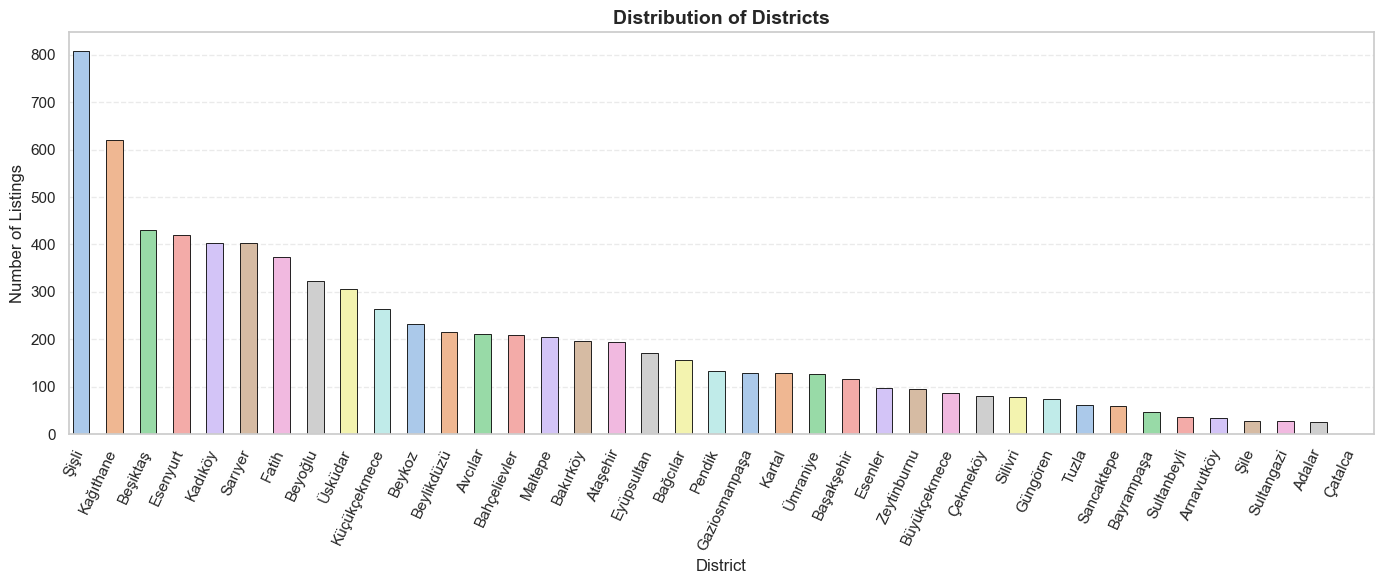

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Stil ayarı
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# 📊 Barplot (daha ayrık görünüm için bar genişliği azaltıldı)
sns.countplot(
    data=df,
    x="İlçe",
    order=df["İlçe"].value_counts().index,
    palette="pastel",
    edgecolor="black",
    linewidth=0.6
)

# 🎨 Başlık ve etiketler
plt.title("Distribution of Districts", fontsize=14, weight="bold")
plt.xlabel("District")
plt.ylabel("Number of Listings")
plt.xticks(rotation=65, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)

# 🛠 Barlar arasını açmak için bar genişliği ayarlanır
for bar in plt.gca().patches:
    bar.set_width(0.5)

plt.tight_layout()
plt.show()


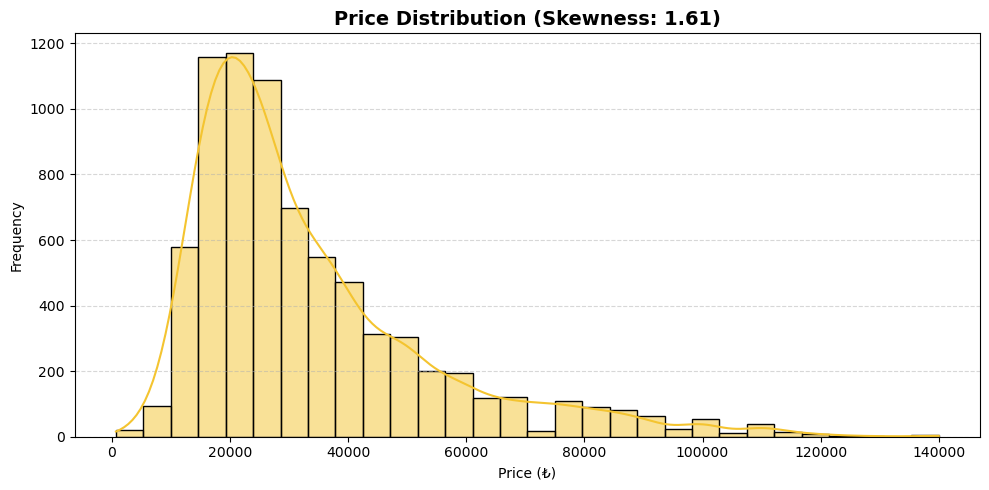

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Histogram için veri (örneğin kira fiyatları)
col = "Fiyat"  # veya df'de varsa "Price"
skewness = skew(df[col].dropna())

# 📊 Histogram + KDE
plt.figure(figsize=(10, 5))
sns.histplot(df[col].dropna(), bins=30, kde=True, color="#f4c430", edgecolor="black")

# 🏷 Başlık ve etiketler
plt.title(f"Price Distribution (Skewness: {skewness:.2f})", fontsize=14, weight="bold")
plt.xlabel("Price (₺)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


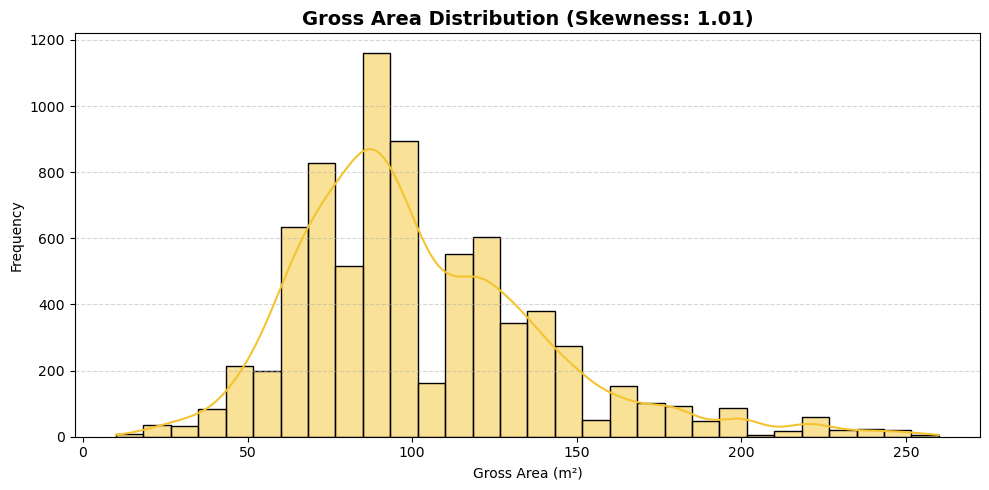

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Kolon adı
col = "Brüt m2"  # Verideki tam sütun adı neyse o olmalı
skewness = skew(df[col].dropna())

# 📊 Histogram + KDE
plt.figure(figsize=(10, 5))
sns.histplot(df[col].dropna(), bins=30, kde=True, color="#f4c430", edgecolor="black")

# 🏷 Başlık ve etiketler
plt.title(f"Gross Area Distribution (Skewness: {skewness:.2f})", fontsize=14, weight="bold")
plt.xlabel("Gross Area (m²)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


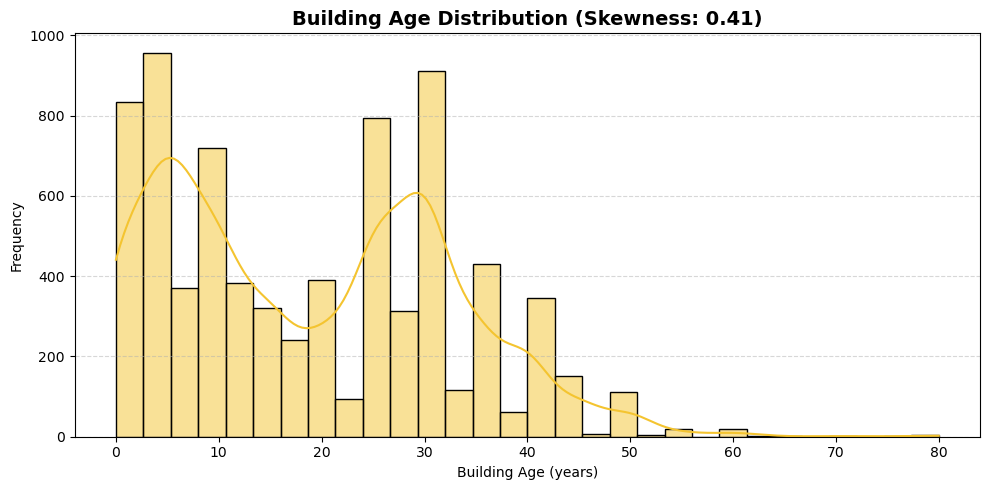

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Hedef değişken
col = "Bina Yaşı"
skewness = skew(df[col].dropna())

# Histogram + KDE
plt.figure(figsize=(10, 5))
sns.histplot(df[col].dropna(), bins=30, kde=True, color="#f4c430", edgecolor="black")

# Başlık ve etiketler
plt.title(f"Building Age Distribution (Skewness: {skewness:.2f})", fontsize=14, weight="bold")
plt.xlabel("Building Age (years)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


C:\Users\bedir\AppData\Local\Temp\ipykernel_19560\2404759593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


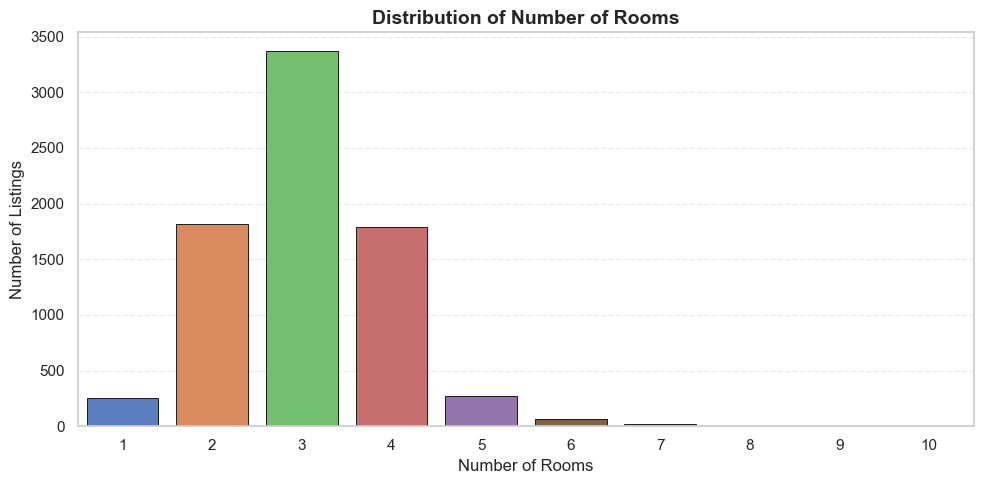

In [11]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.countplot(
    data=df,
    x="Oda Sayısı",
    order=sorted(df["Oda Sayısı"].unique()),
    palette="muted",
    edgecolor="black",
    linewidth=0.6
)
plt.title("Distribution of Number of Rooms", fontsize=14, weight="bold")
plt.xlabel("Number of Rooms")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()